In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import *
from random import seed
from scipy import stats
import seaborn as sns
import pingouin as pg
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV


Load data

In [76]:
# load data from pickle and convert to dataframe
brain_test = pd.read_pickle("3_brain_test.pkl")
brain_train = pd.read_pickle("3_brain_train.pkl")
main_test = pd.read_pickle("3_main_test.pkl")
main_train = pd.read_pickle("3_main_train.pkl")
brain_test = pd.DataFrame(brain_test)
brain_train = pd.DataFrame(brain_train)
main_test = pd.DataFrame(main_test)
main_train = pd.DataFrame(main_train)

Select with or without excluded subjects

In [77]:
#main_test = main_test[main_test["Excluded"]==0]

del main_test["BA ASEG Corr"]
del main_test["BA A2009 Corr"]

Show the data

In [78]:
main_test.head()

,Age,Gender,Total PA,Vigorous PA,Moderate PA,Light PA,BMI,ECG max workload,ECG max heart rate,SR Walking PA,SR Moderate PA,SR Vigorous PA,Hand grip L,Hand grip R,Excluded,Imaging site,Smoking,Townsend deprivation,BA ASEG Delta Corr,BA A2009 Delta Corr
2,73.0,Female,2550.2400,10.0800,352.8000,2187.3600,26.9,NaN,NaN,1188.0,120.0,0.0,20.0,26.0,0,Cheadle,No,-3.469800,11.851897,9.052421
6,67.0,Male,1302.9120,0.0000,100.2240,1202.6880,34.2,NaN,NaN,330.0,2880.0,1080.0,42.0,36.0,1,Cheadle,No,-2.203830,2.747088,-16.621956
12,56.0,Male,1601.3088,18.9504,227.4048,1354.9536,28.4,120.0,117.0,396.0,900.0,0.0,35.0,39.0,1,Cheadle,No,0.642148,-2.482079,3.669890
21,56.0,Female,2465.2224,29.1168,427.0464,2009.0592,33.6,NaN,NaN,2970.0,720.0,240.0,18.0,18.0,1,Cheadle,No,-5.554810,-9.727045,-4.296143
25,70.0,Female,2746.1376,10.0224,210.4704,2525.6448,22.1,NaN,NaN,2772.0,240.0,320.0,22.0,20.0,0,Reading,No,-0.812078,-15.296639,-10.637444


# Basic distributions

- Comparing training and test set based on
    - Gender
    - Age
    - Self-reported PA
    - ??
- Comparing excluded and included subjects based on
    - Gender
    - Age
    - PA
    - Brain Age Delta

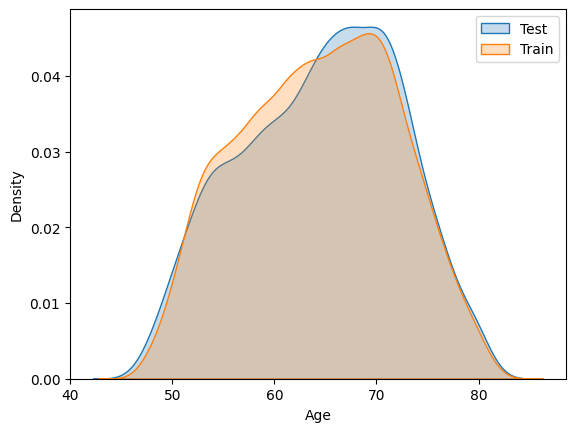

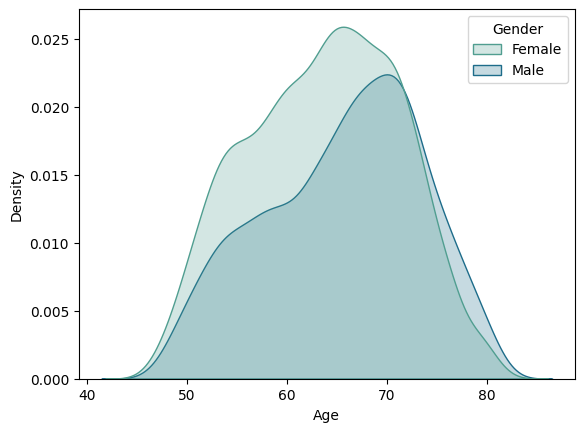

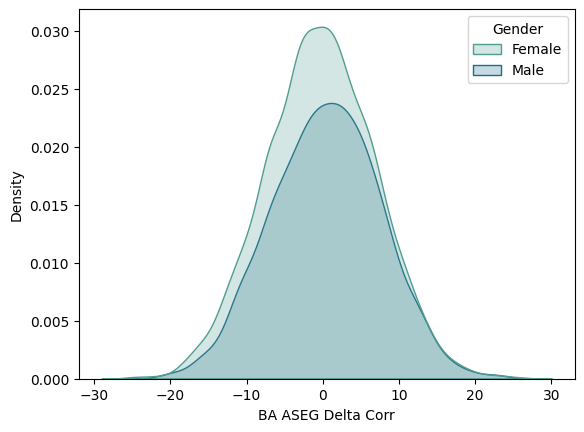

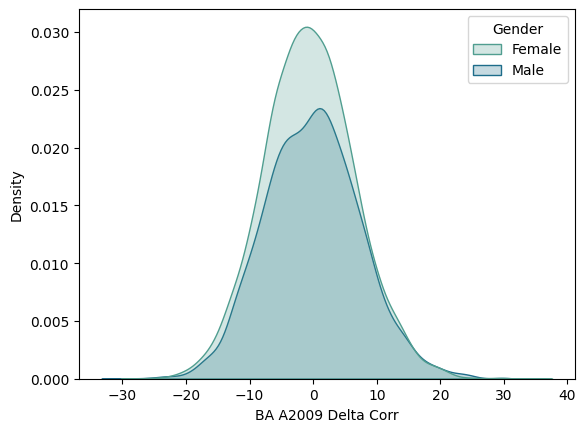

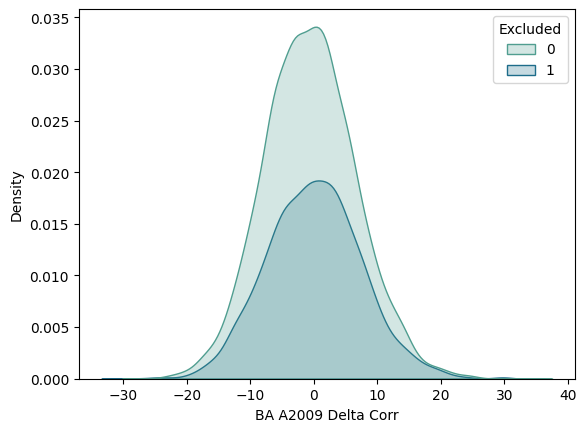

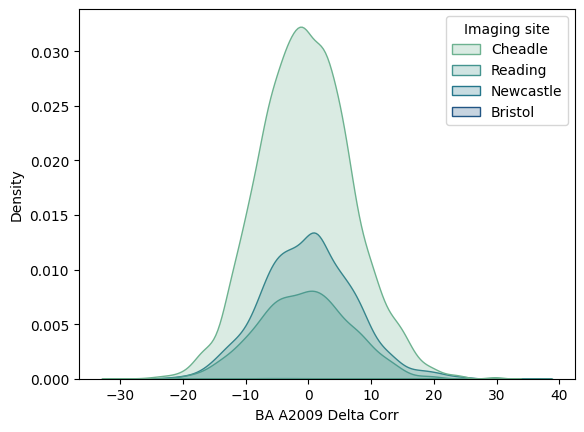

In [79]:
plt.figure()
sns.kdeplot(data = main_test, x= 'Age', fill=True, label = "Test")
sns.kdeplot(data = main_train, x= 'Age', fill=True, label = "Train")
plt.legend()
plt.show()

plt.figure()
sns.kdeplot(data = main_test, x= 'Age', hue = 'Gender', fill=True, palette = "crest")
plt.show()

plt.figure()
sns.kdeplot(data = main_test, x= 'BA ASEG Delta Corr', hue = 'Gender', fill=True, palette = "crest")
plt.show()

plt.figure()
sns.kdeplot(data = main_test, x= 'BA A2009 Delta Corr', hue = 'Gender', fill=True, palette = "crest")
plt.show()

plt.figure()
sns.kdeplot(data = main_test, x= 'BA A2009 Delta Corr', hue = 'Excluded', fill=True, palette = "crest")
plt.show()

plt.figure()
sns.kdeplot(data = main_test, x= 'BA A2009 Delta Corr', hue = 'Imaging site', fill=True, palette = "crest")
plt.show()

Physical activity

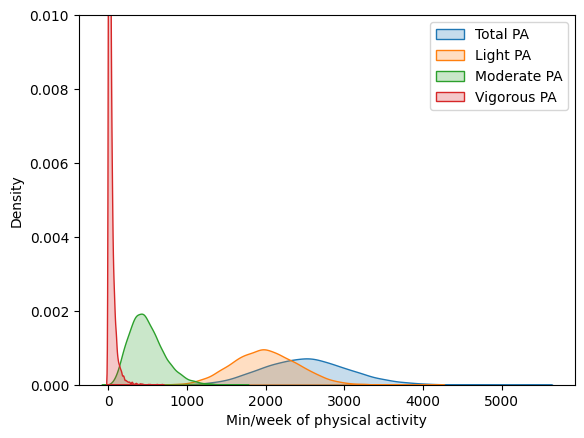

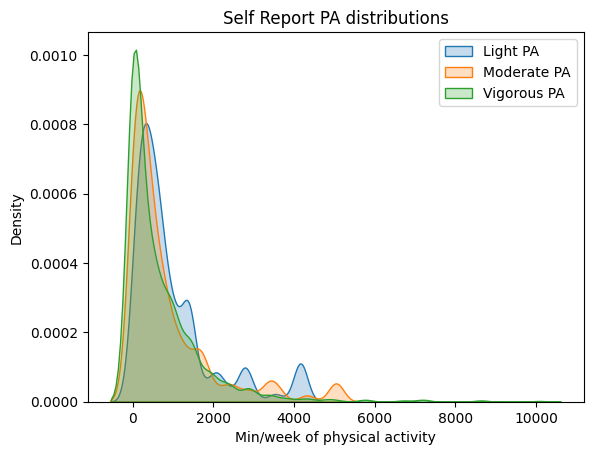

In [80]:
plt.figure()
sns.kdeplot(data = main_test, x= 'Total PA', fill=True, label = "Total PA")
sns.kdeplot(data = main_test, x= 'Light PA', fill=True, label = "Light PA")
sns.kdeplot(data = main_test, x= 'Moderate PA', fill=True, label = "Moderate PA")
sns.kdeplot(data = main_test, x= 'Vigorous PA', fill=True, label = "Vigorous PA")
plt.xlabel("Min/week of physical activity")
plt.legend()
plt.ylim(0,0.01)
plt.show()

plt.figure()
sns.kdeplot(data = main_test, x= 'SR Walking PA', fill=True, label = "Light PA")
sns.kdeplot(data = main_test, x= 'SR Moderate PA', fill=True, label = "Moderate PA")
sns.kdeplot(data = main_test, x= 'SR Vigorous PA', fill=True, label = "Vigorous PA")
plt.xlabel("Min/week of physical activity")
plt.title("Self Report PA distributions")
plt.legend()
plt.show()

Scatterplots -> Association with BrainAge

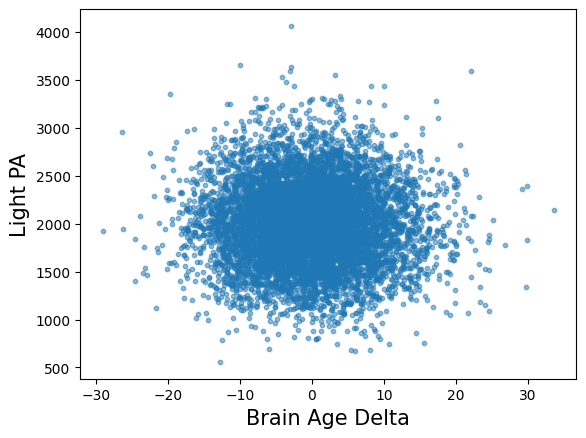

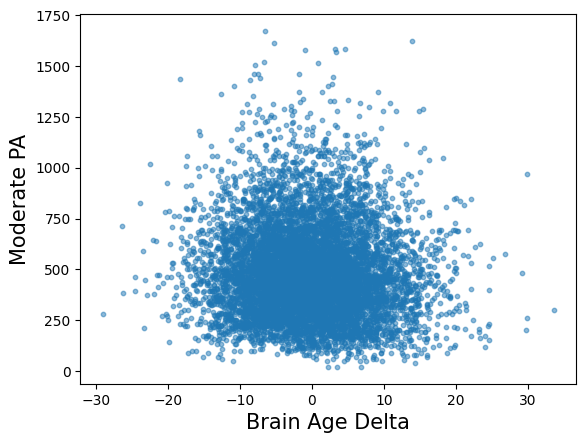

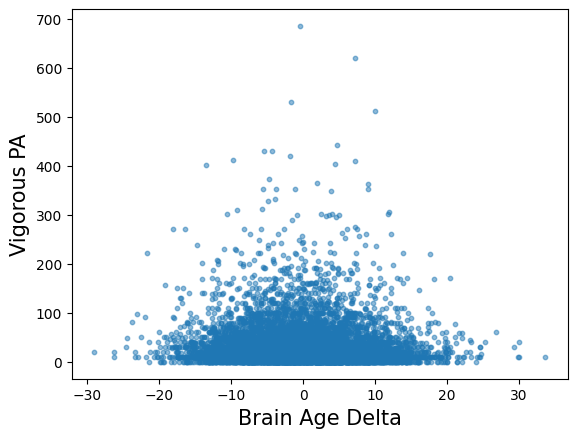

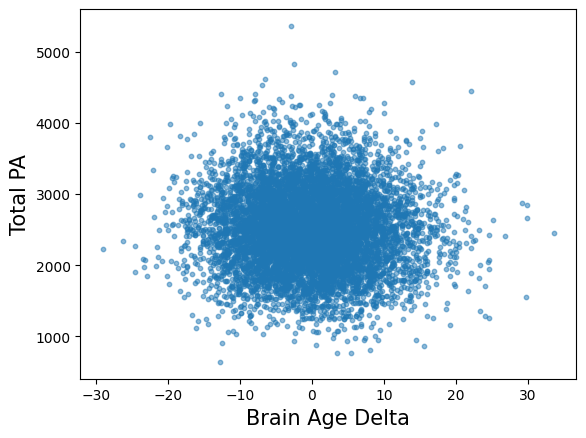

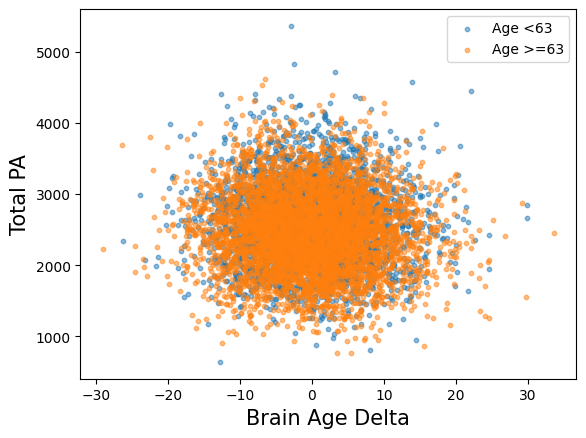

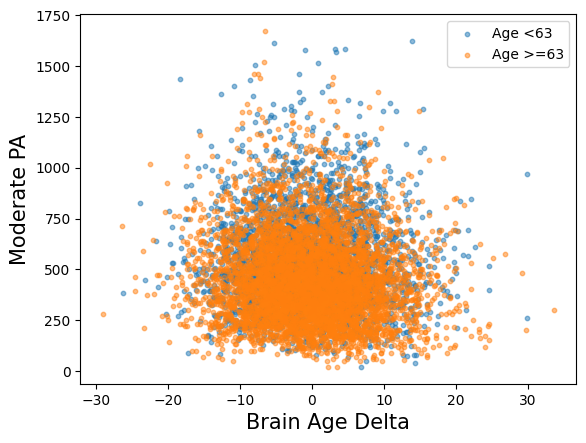

In [81]:
plt.figure()
plt.scatter(main_test["BA A2009 Delta Corr"], main_test["Light PA"], alpha=0.5, s=10)
plt.ylabel("Light PA", fontsize = 15)
plt.xlabel("Brain Age Delta", fontsize = 15)
plt.show()

plt.figure()
plt.scatter(main_test["BA A2009 Delta Corr"], main_test["Moderate PA"], alpha=0.5,s=10)
plt.ylabel("Moderate PA", fontsize = 15)
plt.xlabel("Brain Age Delta", fontsize = 15)
plt.show()

plt.figure()
plt.scatter(main_test["BA A2009 Delta Corr"], main_test["Vigorous PA"], alpha=0.5, s=10)
plt.ylabel("Vigorous PA", fontsize = 15)
plt.xlabel("Brain Age Delta", fontsize = 15)
plt.show()

plt.figure()
plt.scatter(main_test["BA A2009 Delta Corr"], main_test["Total PA"], alpha=0.5, s=10)
plt.ylabel("Total PA", fontsize = 15)
plt.xlabel("Brain Age Delta", fontsize = 15)
plt.show()

main_test_1 = main_test[main_test["Age"]<63]
main_test_2 = main_test[main_test["Age"]>=63]

plt.figure()
plt.scatter(main_test_1["BA A2009 Delta Corr"], main_test_1["Total PA"], alpha=0.5, s=10, label="Age <63")
plt.scatter(main_test_2["BA A2009 Delta Corr"], main_test_2["Total PA"], alpha=0.5, s=10, label="Age >=63")
plt.ylabel("Total PA", fontsize = 15)
plt.xlabel("Brain Age Delta", fontsize = 15)
plt.legend()
plt.show()

plt.figure()
plt.scatter(main_test_1["BA A2009 Delta Corr"], main_test_1["Moderate PA"], alpha=0.5, s=10, label="Age <63")
plt.scatter(main_test_2["BA A2009 Delta Corr"], main_test_2["Moderate PA"], alpha=0.5, s=10, label="Age >=63")
plt.ylabel("Moderate PA", fontsize = 15)
plt.xlabel("Brain Age Delta", fontsize = 15)
plt.legend()
plt.show()

## Correlation Heatmap

<AxesSubplot:>

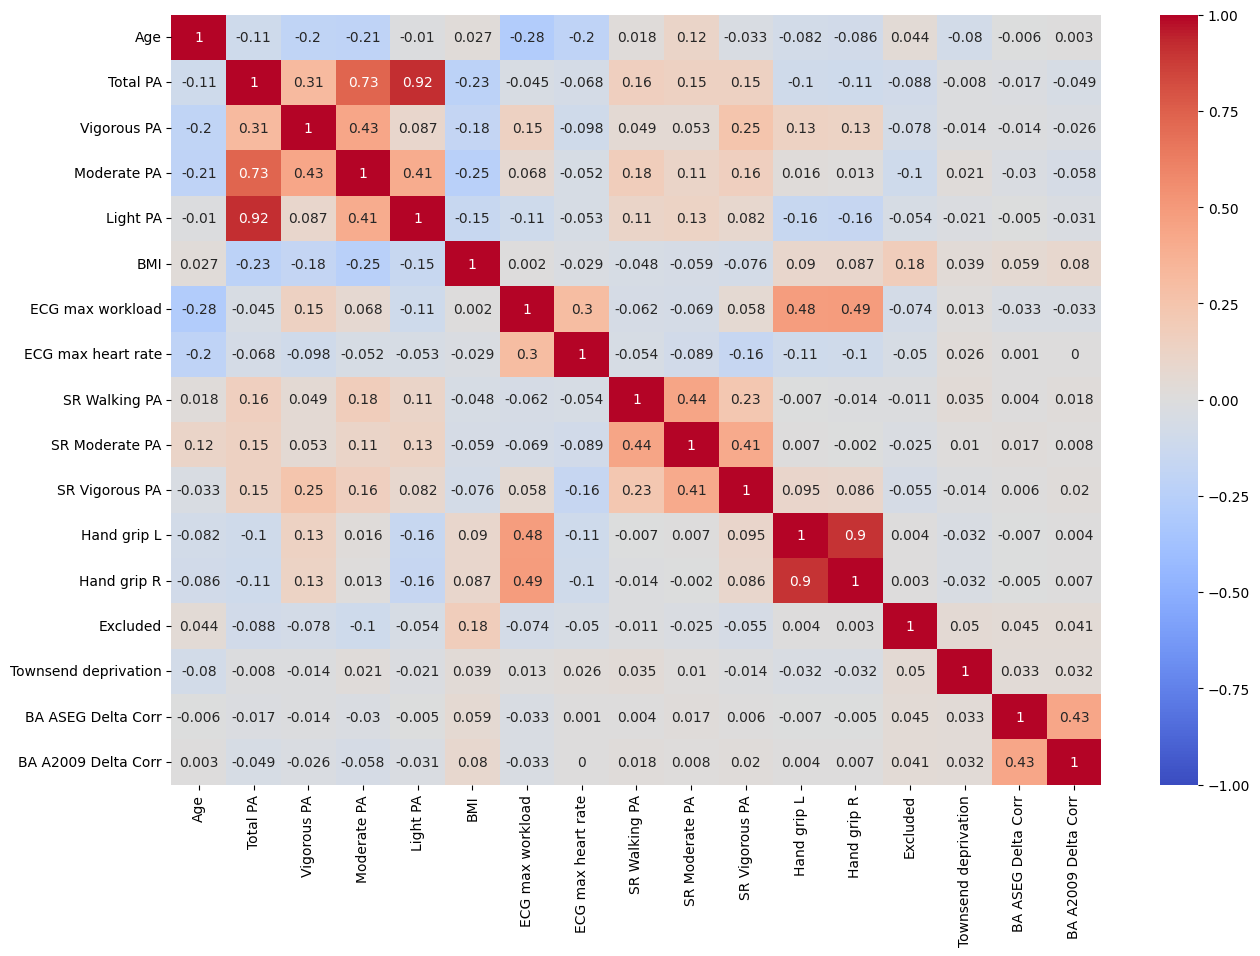

In [82]:
# heat map correlation matrix
# use pcorr to get partial correlations
corr = main_test.corr()
corr = round(corr,3)
fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(corr, annot=True, cmap = "coolwarm", vmin=-1, vmax=1)


# Regression models

## Partial correlations

In [83]:
cov_correlation = pg.partial_corr(data=main_test, x='Vigorous PA', y='BA A2009 Delta Corr', covar='Age')
cov_correlation

,n,r,CI95%,p-val
pearson,8357,-0.025716,"[-0.05, -0.0]",0.018737


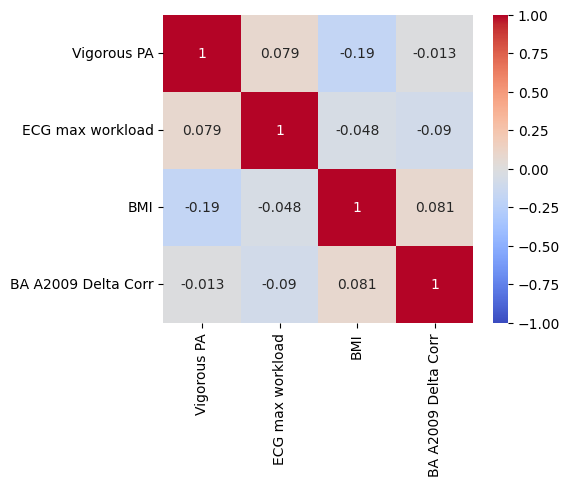

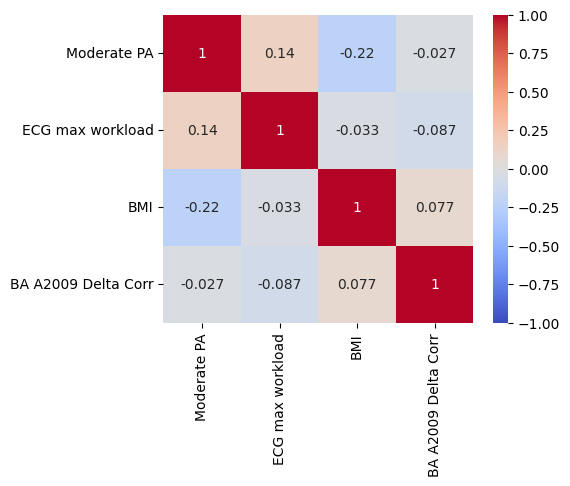

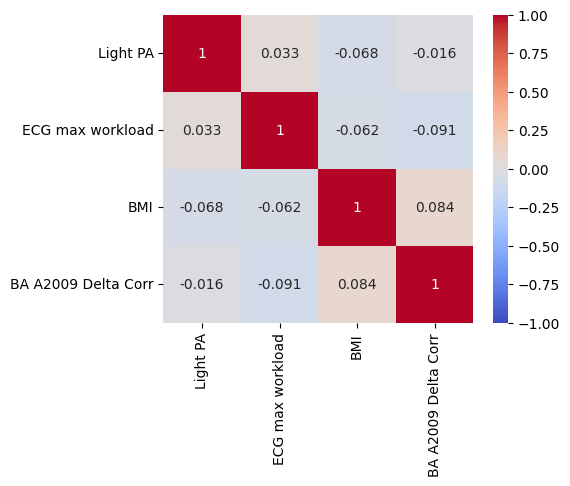

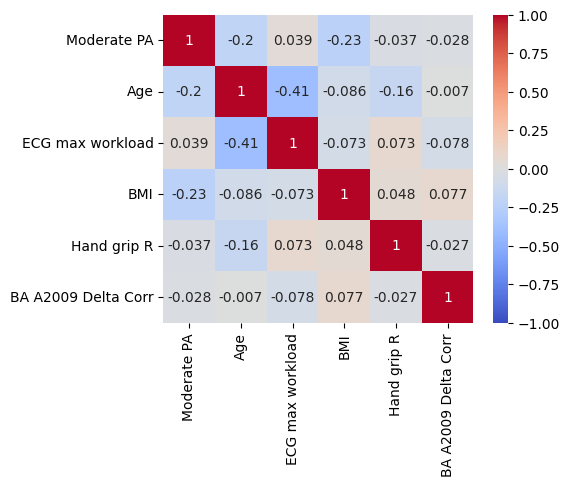

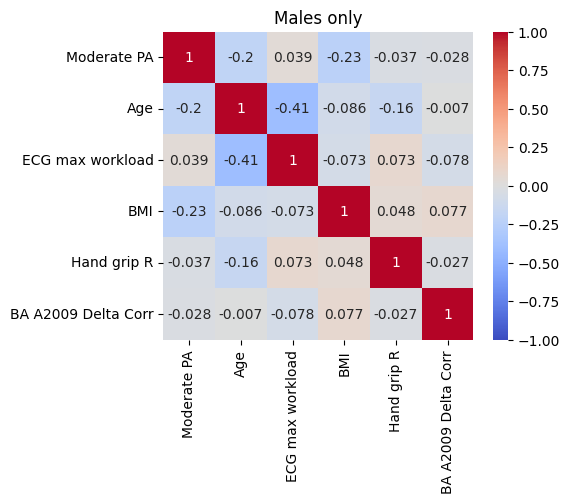

In [87]:

pcorr = main_test[["Vigorous PA", "ECG max workload", "BMI", "BA A2009 Delta Corr", "Imaging site"]].pcorr()
pcorr = round(pcorr,3)
plt.figure(figsize=(5,4)) 
sns.heatmap(pcorr, annot=True, cmap = "coolwarm", vmin=-1, vmax=1)
plt.show()

pcorr = main_test[["Moderate PA", "ECG max workload", "BMI", "BA A2009 Delta Corr", "Imaging site"]].pcorr()
pcorr = round(pcorr,3)
plt.figure(figsize=(5,4)) 
sns.heatmap(pcorr, annot=True, cmap = "coolwarm", vmin=-1, vmax=1)
plt.show()

pcorr = main_test[["Light PA", "ECG max workload", "BMI", "BA A2009 Delta Corr", "Imaging site"]].pcorr()
pcorr = round(pcorr,3)
plt.figure(figsize=(5,4)) 
sns.heatmap(pcorr, annot=True, cmap = "coolwarm", vmin=-1, vmax=1)
plt.show()

pcorr = main_test[["Moderate PA", "Age", "ECG max workload", "BMI", "Hand grip R", "BA A2009 Delta Corr"]].pcorr()
pcorr = round(pcorr,3)
plt.figure(figsize=(5,4)) 
sns.heatmap(pcorr, annot=True, cmap = "coolwarm", vmin=-1, vmax=1)
plt.show()

main_test_1 = main_test[main_test["Gender"]=="Male"]

pcorr = main_test_1[["Moderate PA", "Age", "ECG max workload", "BMI", "Hand grip R", "BA A2009 Delta Corr"]].pcorr()
pcorr = round(pcorr,3)
plt.figure(figsize=(5,4)) 
sns.heatmap(pcorr, annot=True, cmap = "coolwarm", vmin=-1, vmax=1)
plt.title("Males only")
plt.show()

## Multiple linear regression

In [85]:
x = main_test[["Vigorous PA", "Moderate PA", "Light PA"]]
y = main_test["BA A2009 Delta Corr"]
model = LassoCV().fit(x, y)
r_sq = model.score(x, y)
print(f"R squared: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"coefficients: {model.coef_}")

R squared: 0.003310498761326386
intercept: 0.6137830315587418
coefficients: [-0.         -0.00154531 -0.        ]


In [86]:
dataset = main_test[["Moderate PA", "Age", "ECG max workload", "BMI", "Hand grip R", "BA A2009 Delta Corr", "Excluded"]]
dataset = dataset.dropna(axis=0)
x = dataset[["Moderate PA", "Age", "ECG max workload", "BMI", "Hand grip R","Excluded"]]
y = dataset["BA A2009 Delta Corr"]
model = LassoCV().fit(x, y)
r_sq = model.score(x, y)
print(f"R squared: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"coefficients: {model.coef_}")

R squared: 0.02817213965825016
intercept: 0.17476201561173454
coefficients: [-0.00274582  0.00857676 -0.01727385  0.14775742 -0.04537658  0.        ]
